# Step 1 - import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Step 2 - load the dataset

In [2]:
# aps represents air passengers satisfaction
aps_df = pd.read_csv("airline_passenger_satisfaction.csv")
aps_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# description of variables
aps_df.shape

(129880, 24)

In [4]:
# check for object (non-numerical type) data
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [5]:
# to show description of the data in the DataFrame
aps_df.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
aps_df["satisfaction"].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [7]:
# Convert Object into int/float

cat_columns = aps_df.select_dtypes(include = ['object'])
unique_values = cat_columns.nunique(dropna=False)
print (unique_values)

Gender            2
customer_type     2
type_of_travel    2
customer_class    3
satisfaction      2
dtype: int64


In [8]:
# remove the column "Unnamed: 0"
aps_df = aps_df.drop('Unnamed: 0', axis = 1)

# Step 3: Data pre-processing - identify the missing value for each variables

In [9]:
# to check for NaN value
aps_df.isna().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [10]:
# dealing with the NaN value
# drop the row/data with NaN value
aps_df.dropna()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [11]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [12]:
aps_df.satisfaction = [1 if v == 'satisfied' else 0 for v in aps_df.satisfaction]

In [13]:
columns_numeric = []
columns_cat = []

for col in aps_df.columns:
    
    if col in ['satisfaction']:
        continue
    
    if aps_df[col].dtype in ['int64', 'float64']:
        columns_numeric.append(col)
    else: 
        columns_cat.append(col)

columns_cat, columns_numeric

(['Gender', 'customer_type', 'type_of_travel', 'customer_class'],
 ['age',
  'flight_distance',
  'inflight_wifi_service',
  'departure_arrival_time_convenient',
  'ease_of_online_booking',
  'gate_location',
  'food_and_drink',
  'online_boarding',
  'seat_comfort',
  'inflight_entertainment',
  'onboard_service',
  'leg_room_service',
  'baggage_handling',
  'checkin_service',
  'inflight_service',
  'cleanliness',
  'departure_delay_in_minutes',
  'arrival_delay_in_minutes'])

In [14]:
# find unqiue values
aps_df.apply(lambda x: len(x.unique()))

Gender                                  2
customer_type                           2
age                                    75
type_of_travel                          2
customer_class                          3
flight_distance                      3821
inflight_wifi_service                   6
departure_arrival_time_convenient       6
ease_of_online_booking                  6
gate_location                           6
food_and_drink                          6
online_boarding                         6
seat_comfort                            6
inflight_entertainment                  6
onboard_service                         6
leg_room_service                        6
baggage_handling                        5
checkin_service                         6
inflight_service                        6
cleanliness                             6
departure_delay_in_minutes            466
arrival_delay_in_minutes              473
satisfaction                            2
dtype: int64

# Step 4 - Data  Correlation

Correlation between departure and arrival delays:  0.9652911835467097


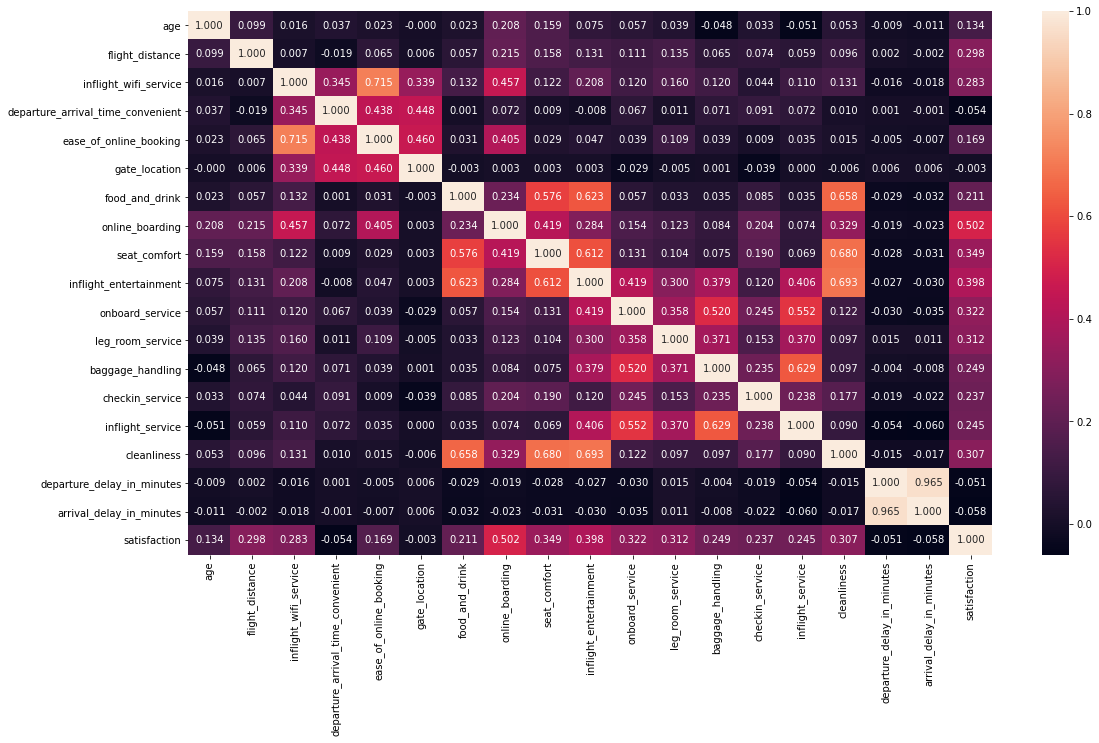

In [15]:
# Correlation matrix heatmap- to determine if two variables in a dataset are related in any way

corrmat = aps_df.corr()
plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, fmt='.3f')
print ('Correlation between departure and arrival delays: ', corrmat['arrival_delay_in_minutes']['departure_delay_in_minutes'])
plt.savefig("lr1.jpg", dpi=300)

In [16]:
# Fix data by imputation
aps_df['arrival_delay_in_minutes'].fillna(aps_df['departure_delay_in_minutes'], inplace = True)
print (aps_df.isnull().sum())

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64


# Step 5 - Data Visualization

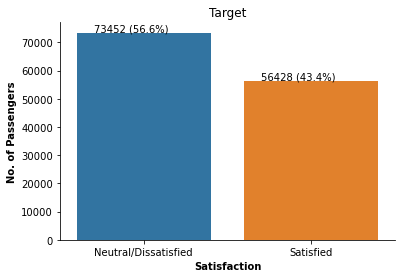

In [17]:
# plotting the graph
# Seaborn count plot - to show the number of occurrences or frequency for each categorical data using bars
ax = sns.countplot(aps_df["satisfaction"])
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(aps_df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='10')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='10')  
sns.despine()
plt.title("Target");
plt.savefig("lr2.jpg", dpi=300)

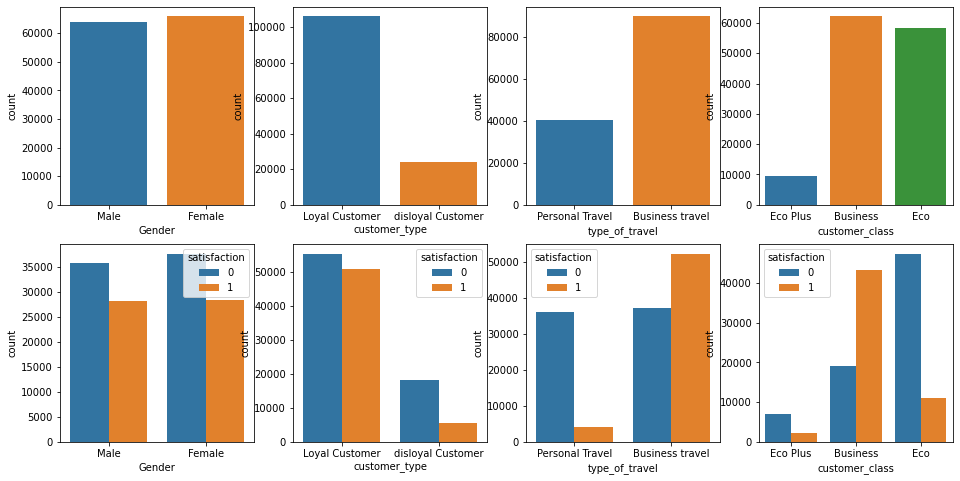

In [18]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(columns_cat):
    plt.subplot(2, 4, i+1)
    sns.countplot(data= aps_df, x=col)
    plt.subplot(2, 4, i+5)  
    sns.countplot(data= aps_df, x=col, hue='satisfaction')
    
plt.savefig("lr3.jpg", dpi=300)

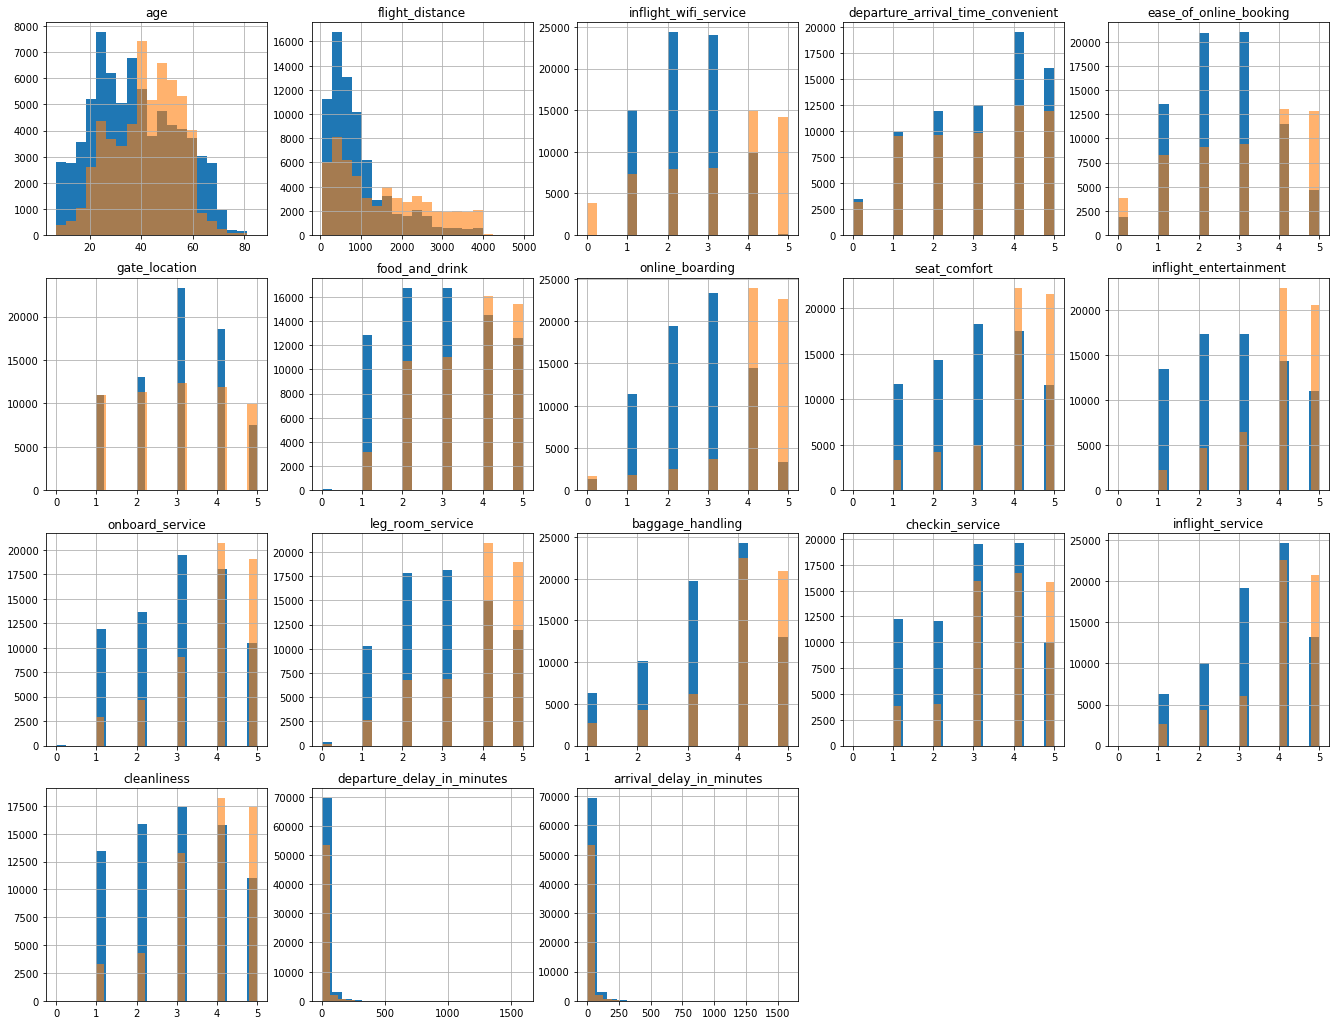

In [19]:
plt.figure(figsize=(23, 18))
for i, col in enumerate(columns_numeric):
    plt.subplot(4, 5, i+1)
    aps_df[col][aps_df.satisfaction == 0].hist(bins=20)
    aps_df[col][aps_df.satisfaction == 1].hist(bins=20, alpha=0.6)    
    plt.title(f'{col}')

plt.savefig("lr4.jpg", dpi=300)

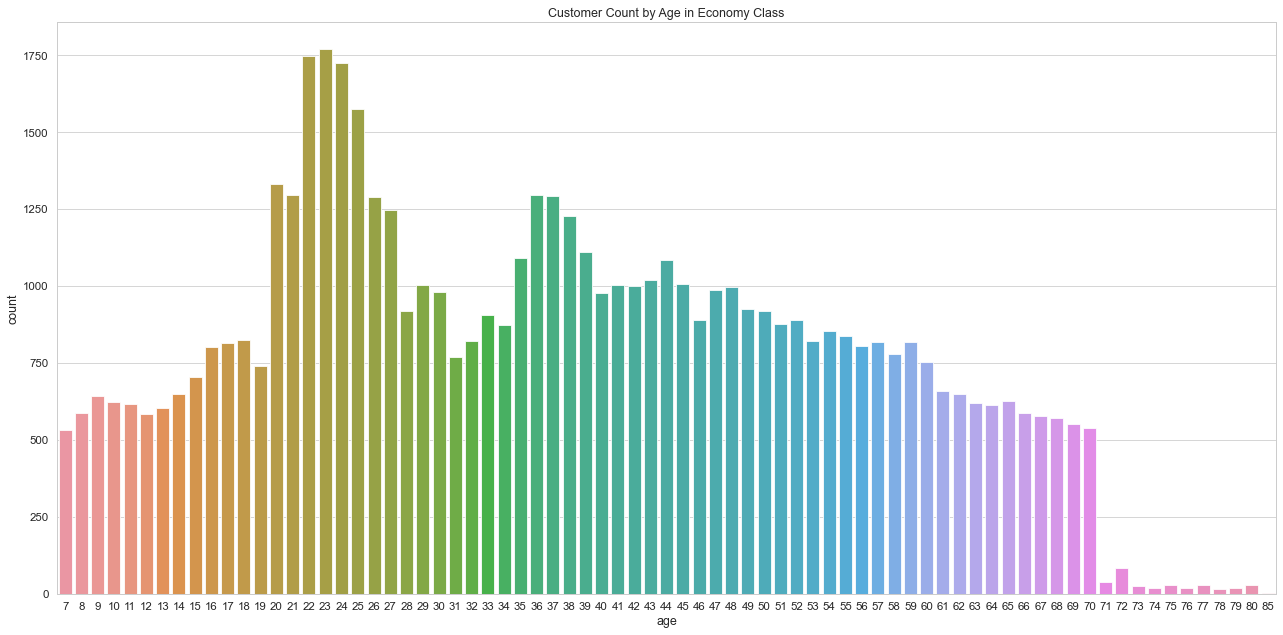

<Figure size 432x288 with 0 Axes>

In [20]:
# Grouping count customer for each class
df_eco = aps_df[aps_df['customer_class']=='Eco']

# Show distribution graph each class by age (customer)
## show the economy class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_eco,x='age')
ax.set_title('Customer Count by Age in Economy Class')
plt.tight_layout()
plt.show()
plt.savefig("lr5.jpg", dpi=300)


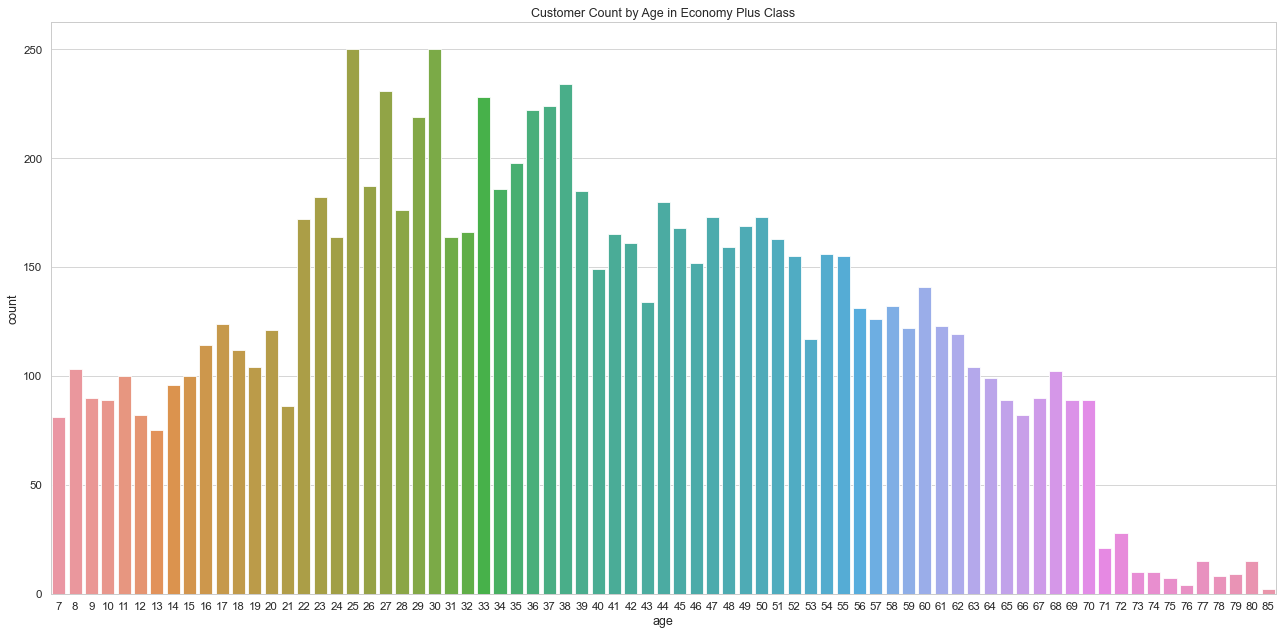

<Figure size 432x288 with 0 Axes>

In [21]:
df_eco1 = aps_df[aps_df['customer_class']=='Eco Plus']
## show the economy plus class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_eco1,x='age')
ax.set_title('Customer Count by Age in Economy Plus Class')
plt.tight_layout()
plt.show()
plt.savefig("lr6.jpg", dpi=300)

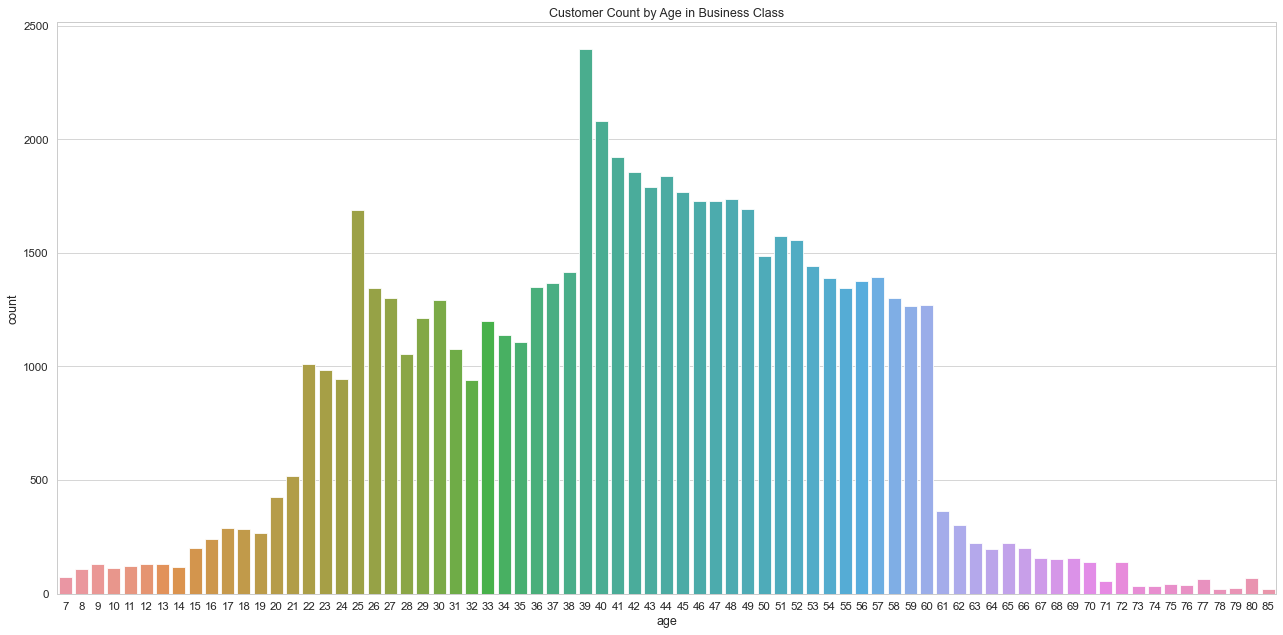

<Figure size 432x288 with 0 Axes>

In [22]:
df_bus = aps_df[aps_df['customer_class']=='Business']
## show the business class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_bus,x='age')
ax.set_title('Customer Count by Age in Business Class')
plt.tight_layout()
plt.show()
plt.savefig("lr7.jpg", dpi=300)

# Step 6 - Data distribution- Training and Testing data preparation 

In [23]:
# dummy encoding to prepare separate columns for all unique values under the same targeted column
def dummy_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)#concate new columns to the dataframe
    df=df.drop(column,axis=1)#drop original data
    return df

In [24]:
# ordinal encoding to transform object type dependent variables into int type in one column
dictionary_satisfication=[{'col':'satisfaction','mapping':{'satisfied':1,'neutral or dissatisfied':0}}]
dictionary_custype=[{'col':'customer_type','mapping':{'Loyal Customer':1,'disloyal Customer':0}}]

encoder1=ce.OrdinalEncoder(cols='satisfaction',mapping=dictionary_satisfication)
encoder2=ce.OrdinalEncoder(cols='customer_type',mapping=dictionary_custype)

In [25]:
# Encoding the categorical data of independent variables:Gender,type_of_travel,customer_class
df1=dummy_encode(aps_df,'Gender')
df1=dummy_encode(df1,'customer_class')
df1=dummy_encode(df1,'type_of_travel')
#encoding the categorical data of dependent variables:satisfaction,customer_type
aps_df=encoder1.fit_transform(df1)
aps_df=encoder2.fit_transform(df1)


In [26]:
# to print a concise summary of a DataFrame
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   customer_type                      129880 non-null  int32  
 1   age                                129880 non-null  int64  
 2   flight_distance                    129880 non-null  int64  
 3   inflight_wifi_service              129880 non-null  int64  
 4   departure_arrival_time_convenient  129880 non-null  int64  
 5   ease_of_online_booking             129880 non-null  int64  
 6   gate_location                      129880 non-null  int64  
 7   food_and_drink                     129880 non-null  int64  
 8   online_boarding                    129880 non-null  int64  
 9   seat_comfort                       129880 non-null  int64  
 10  inflight_entertainment             129880 non-null  int64  
 11  onboard_service                    1298

# Step 7 - Data Modelling

In [27]:
# create several empty lists
acc_logr_train_data_list = []
acc_logr_test_data_list = []
pre_logr_train_data_list = []
pre_logr_test_data_list = []
recall_logr_train_data_list = []
recall_logr_test_data_list = []

# Prepare for modeling - migrate to Numpy and split to training and test sets
used_data = aps_df.drop (['satisfaction'],axis = 1)
x = used_data.values 
y = aps_df['satisfaction'].values

# Normalize features
for feature in range (x.shape[1]):
    min = x[:,feature].min()
    max = x[:,feature].max()
    x[:,feature] = (x[:,feature]-min) / (max-min)

    
# generate 100 different training/testing dataset (using random_state=1 to random_state=100), and repeat the same experiments
for seed in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.20, random_state=seed)
    
    # Building a Logistic Regression model
    #logr = make_pipeline(StandardScaler(), LogisticRegression())
    logr = LogisticRegression(max_iter = 1000)
    logr.fit(x_train, y_train)  # apply scaling on training data
    
    # Model Evaluation - Training data Evaluation
    x_train_prediction = logr.predict(x_train)
    logr_train_data_acc_score = accuracy_score(y_train,x_train_prediction)
    logr_train_data_pre_score = precision_score(y_train,x_train_prediction)
    logr_train_data_recall = recall_score(y_train,x_train_prediction)
    
    # Model Evaluation - Testing data Evaluation
    x_test_prediction = logr.predict(x_test)
    logr_test_data_acc_score = accuracy_score(x_test_prediction,y_test)
    logr_test_data_pre_score = precision_score(x_test_prediction,y_test)
    logr_test_data_recall = recall_score(x_test_prediction,y_test)
    
    # add Accuracy score, Precision and Recall and and show the output for both training and testing data
    
    acc_logr_train_data_list.append(logr_train_data_acc_score)
    acc_logr_test_data_list.append(logr_test_data_acc_score)
    pre_logr_train_data_list.append(logr_train_data_pre_score)
    pre_logr_test_data_list.append(logr_test_data_pre_score)
    recall_logr_train_data_list.append(logr_train_data_recall)
    recall_logr_test_data_list.append(logr_test_data_recall)

print("Accuracy for the train data: ", acc_logr_train_data_list)
print("Accuracy for the test data: ", acc_logr_test_data_list)
print("Precision for the train data: ", pre_logr_train_data_list)
print("Precision for the test data: ", pre_logr_test_data_list)
print("Recall for the train data: ", recall_logr_train_data_list)
print("Recall for the test data: ", recall_logr_test_data_list)

Accuracy for the train data:  [0.875, 0.8747016476747768, 0.8745572836464429, 0.874576532183554, 0.875750692947336, 0.8747305204804435, 0.8750096242685556, 0.8750769941484448, 0.8738547120418848, 0.8753079765937789, 0.8745957807206652, 0.8740760702186634, 0.8744995380351094, 0.8742108099784416, 0.8742396827841085, 0.8740087003387742, 0.8742878041268863, 0.8745957807206652, 0.8748652602402217, 0.875423467816446, 0.8744321681552202, 0.8747112719433323, 0.8747978903603326, 0.874461040960887, 0.8739509547274407, 0.874461040960887, 0.8739798275331074, 0.8747112719433323, 0.8737488450877733, 0.8745091623036649, 0.8749037573144441, 0.8751058669541115, 0.8735948567908839, 0.8741434400985525, 0.8747497690175546, 0.8741819371727748, 0.8738547120418848, 0.8743840468124423, 0.8742781798583308, 0.874461040960887, 0.8742300585155528, 0.8750673698798891, 0.8741241915614413, 0.8740279488758854, 0.8746054049892208, 0.8739124576532183, 0.8742685555897752, 0.8740664459501077, 0.8757891900215584, 0.874894

In [28]:
# Get most important tree features

features = used_data.columns
coefficients = logr.coef_[0]
leading_indices = (-coefficients).argsort()[:23]
print ("Sorted coefficients for features:")
for i in range (23):
   print (i+1, features[leading_indices[i]], round(coefficients[leading_indices[i]],2))

Sorted coefficients for features:
1 online_boarding 3.01
2 customer_type 2.03
3 inflight_wifi_service 1.97
4 checkin_service 1.62
5 onboard_service 1.51
6 type_of_travel_Business travel 1.36
7 leg_room_service 1.27
8 cleanliness 1.11
9 inflight_service 0.58
10 baggage_handling 0.54
11 customer_class_Business 0.5
12 seat_comfort 0.35
13 inflight_entertainment 0.3
14 gate_location 0.12
15 Gender_Male 0.02
16 Gender_Female -0.04
17 flight_distance -0.08
18 food_and_drink -0.13
19 customer_class_Eco -0.2
20 customer_class_Eco Plus -0.3
21 age -0.61
22 departure_arrival_time_convenient -0.64
23 ease_of_online_booking -0.73


# Step 8 - Model Evaluation 

In [29]:
# Mean Absolute Error for the training data

training_data_mean_absolute_error = mean_absolute_error(x_train_prediction, y_train)

In [30]:
print("Mean Absolute Error score of the training data: ", training_data_mean_absolute_error)

Mean Absolute Error score of the training data:  0.1260394210040037


In [31]:
# Mean Absolute Error for the testing data

testing_data_mean_absolute_error = mean_absolute_error(x_test_prediction, y_test)

In [32]:
print("Mean Absolute Error score of the testing data: ", testing_data_mean_absolute_error)

Mean Absolute Error score of the testing data:  0.12334462580843857


In [33]:
df = pd.DataFrame([[acc_logr_train_data_list[0],acc_logr_test_data_list[0], 
                     pre_logr_train_data_list[0], pre_logr_test_data_list[0],
                     recall_logr_train_data_list[0],  recall_logr_test_data_list[0]]],
                     columns = ["Train data Accuracy","Test data Accuracy","Train data Precision","Test data Precision"
                               ,"Train data Recall","Test data Recall"])

for x in range(1,100):
        to_append = [acc_logr_train_data_list[x], acc_logr_test_data_list[x], 
                     pre_logr_train_data_list[x], pre_logr_test_data_list[x],
                     recall_logr_train_data_list[x],  recall_logr_test_data_list[x]]
        alpha_data = pd.Series(to_append, index = df.columns)
        df = df.append(alpha_data, ignore_index = True)
                   
pd.set_option("display.float_format", lambda x: "%.4f" %x) 
with pd.option_context('expand_frame_repr',False):
     print(df)
df.describe()

    Train data Accuracy  Test data Accuracy  Train data Precision  Test data Precision  Train data Recall  Test data Recall
0                0.8750              0.8722                0.8701               0.8307             0.8370            0.8701
1                0.8747              0.8747                0.8703               0.8307             0.8372            0.8714
2                0.8746              0.8753                0.8695               0.8333             0.8367            0.8744
3                0.8746              0.8745                0.8696               0.8330             0.8360            0.8748
4                0.8758              0.8705                0.8711               0.8267             0.8379            0.8693
..                  ...                 ...                   ...                  ...                ...               ...
95               0.8750              0.8730                0.8711               0.8358             0.8357            0.8680
96      

,Train data Accuracy,Test data Accuracy,Train data Precision,Test data Precision,Train data Recall,Test data Recall
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,0.8745,0.8746,0.8700,0.8356,0.8359,0.8707
std,0.0005,0.0018,0.0006,0.0033,0.0007,0.0031
min,0.8736,0.8695,0.8689,0.8267,0.8347,0.8622
25%,0.8741,0.8737,0.8696,0.8333,0.8354,0.8683
50%,0.8744,0.8747,0.8700,0.8363,0.8359,0.8712
75%,0.8747,0.8758,0.8704,0.8378,0.8364,0.8728
max,0.8758,0.8786,0.8714,0.8434,0.8380,0.8772


In [34]:
# compute the mean for data
train_data_logr_acc_mean = np.mean(acc_logr_train_data_list)
test_data_logr_acc_mean = np.mean(acc_logr_test_data_list)
train_Data_logr_pre_mean = np.mean(pre_logr_train_data_list)
test_data_logr_pre_mean = np.mean(pre_logr_test_data_list)
train_data_logr_recall_mean = np.mean(recall_logr_train_data_list)
test_data_logr_recall_mean = np.mean(recall_logr_test_data_list)

# show the mean for data
print('Train data Accuracy mean : ', train_data_logr_acc_mean)
print('Test data Accuracy mean : ', test_data_logr_acc_mean)
print('Train data Precision mean : ', train_Data_logr_pre_mean)
print('Test data Precision mean : ', test_data_logr_pre_mean)
print('Train data Recall mean : ', train_data_logr_recall_mean)
print('Test data Recall mean : ', test_data_logr_recall_mean)

# add the performance mean of model
performance_logr = (train_data_logr_acc_mean,test_data_logr_acc_mean,train_Data_logr_pre_mean,test_data_logr_pre_mean
                    ,train_data_logr_recall_mean,test_data_logr_recall_mean)

Train data Accuracy mean :  0.8744779796735448
Test data Accuracy mean :  0.874590391130274
Train data Precision mean :  0.8700128811318385
Test data Precision mean :  0.8356329555095181
Train data Recall mean :  0.8359412309822776
Test data Recall mean :  0.870681485009968


In [35]:
mean_df = pd.DataFrame([[train_data_logr_acc_mean,test_data_logr_acc_mean,
                       train_Data_logr_pre_mean, test_data_logr_pre_mean,
                       train_data_logr_recall_mean, test_data_logr_recall_mean]],
                       columns = ['Train data Accuracy', 'Test data Accuracy',
                                  'Train data Precision', 'Test data Precision', 
                                  'Train data Recall','Test data Recall'])
mean_df.index = ['mean']

pd.set_option("display.float_format", lambda x: "%.4f" %x) 
with pd.option_context('expand_frame_repr',False):

    print(mean_df)

      Train data Accuracy  Test data Accuracy  Train data Precision  Test data Precision  Train data Recall  Test data Recall
mean               0.8745              0.8746                0.8700               0.8356             0.8359            0.8707


In [36]:

#compute confidence interval using 95% confidence level
confidence_level = 0.95 

# confidence interval for train data acc_score
acc_train_confidence_interval = st.t.interval(alpha = confidence_level, df = len(acc_logr_train_data_list)-1,
loc = np.mean(acc_logr_train_data_list), scale = st.sem(acc_logr_train_data_list))
print('Confidence interval for train data accuracy score : ', acc_train_confidence_interval)

# confidence interval for test data acc_score
acc_test_confidence_interval = st.t.interval(alpha = confidence_level, df=len(acc_logr_test_data_list)-1,
loc = np.mean(acc_logr_test_data_list),scale = st.sem(acc_logr_test_data_list))
print('Confidence interval for test data accuracy score : ', acc_test_confidence_interval)

# confidence interval for train data pre_score
pre_train_confidence_interval = st.t.interval(alpha = confidence_level, df = len(pre_logr_train_data_list)-1,
loc = np.mean(pre_logr_train_data_list), scale = st.sem(pre_logr_train_data_list))
print('Confidence interval for train data precision score : ', pre_train_confidence_interval)

#confidence interval for test data pre_score
pre_test_confidence_interval = st.t.interval(alpha = confidence_level, df = len( pre_logr_test_data_list)-1,
loc = np.mean( pre_logr_test_data_list), scale = st.sem( pre_logr_test_data_list))
print('Confidence interval for test data precision score : ', pre_test_confidence_interval)

#confidence interval for train data recall
recall_train_confidence_interval = st.t.interval(alpha = confidence_level, df = len(recall_logr_train_data_list)-1,
loc = np.mean(recall_logr_train_data_list), scale = st.sem(recall_logr_train_data_list))
print('Confidence interval for train data recall : ', recall_train_confidence_interval)

#confidence interval for test data recall
recall_test_confidence_interval = st.t.interval(alpha = confidence_level, df = len(recall_logr_test_data_list)-1,
loc = np.mean(recall_logr_test_data_list), scale = st.sem(recall_logr_test_data_list))
print('Confidence interval for test data recall : ', recall_test_confidence_interval)

Confidence interval for train data accuracy score :  (0.8743860541260197, 0.8745699052210699)
Confidence interval for test data accuracy score :  (0.8742359891473402, 0.8749447931132078)
Confidence interval for train data precision score :  (0.8699026404061416, 0.8701231218575354)
Confidence interval for test data precision score :  (0.8349711608462642, 0.836294750172772)
Confidence interval for train data recall :  (0.8357953012949588, 0.8360871606695963)
Confidence interval for test data recall :  (0.8700677986845374, 0.8712951713353986)


In [37]:
con_df = pd.DataFrame([[acc_train_confidence_interval[0],acc_train_confidence_interval[1]],
                       [acc_test_confidence_interval[0], acc_test_confidence_interval[1]],
                       [pre_train_confidence_interval[0], pre_train_confidence_interval[1]],
                       [pre_test_confidence_interval[0],pre_test_confidence_interval[1]],
                       [recall_train_confidence_interval[0], recall_train_confidence_interval[1]],
                       [recall_test_confidence_interval[0], recall_test_confidence_interval[1]]], 
                       columns = ['Confidence Interval - Lower_Boundary', 'Confidence Interval - Upper_Boundary'])
                       
con_df.index = ['Train Data Accuracy Score', 'Test Data Accuracy Score', 'Train Data Precision Score',
                'Test Data Precision Score', 'Train Data Recall Score', 'Test Data Recall Score']
                
pd.set_option("display.float_format", lambda x: "%.4f" %x) 
print(con_df)

                            Confidence Interval - Lower_Boundary  \
Train Data Accuracy Score                                 0.8744   
Test Data Accuracy Score                                  0.8742   
Train Data Precision Score                                0.8699   
Test Data Precision Score                                 0.8350   
Train Data Recall Score                                   0.8358   
Test Data Recall Score                                    0.8701   

                            Confidence Interval - Upper_Boundary  
Train Data Accuracy Score                                 0.8746  
Test Data Accuracy Score                                  0.8749  
Train Data Precision Score                                0.8701  
Test Data Precision Score                                 0.8363  
Train Data Recall Score                                   0.8361  
Test Data Recall Score                                    0.8713  


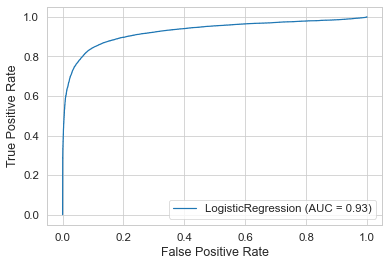

In [38]:
plot_roc_curve(logr, x_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14623
           1       0.87      0.84      0.86     11353

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976

Confusion Matrix:


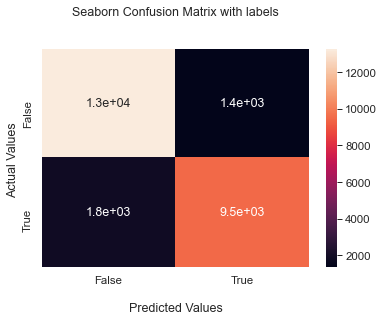

[[13255  1368]
 [ 1836  9517]]


<Figure size 432x288 with 0 Axes>

In [39]:
print(classification_report(y_test,x_test_prediction))

print("Confusion Matrix:")
ax=sns.heatmap(confusion_matrix(y_test, x_test_prediction),annot=True)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Label the confusion matrix table
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

print(confusion_matrix(y_test,x_test_prediction))
plt.savefig("lr8.jpg", dpi=300)